KeyboardInterrupt: 

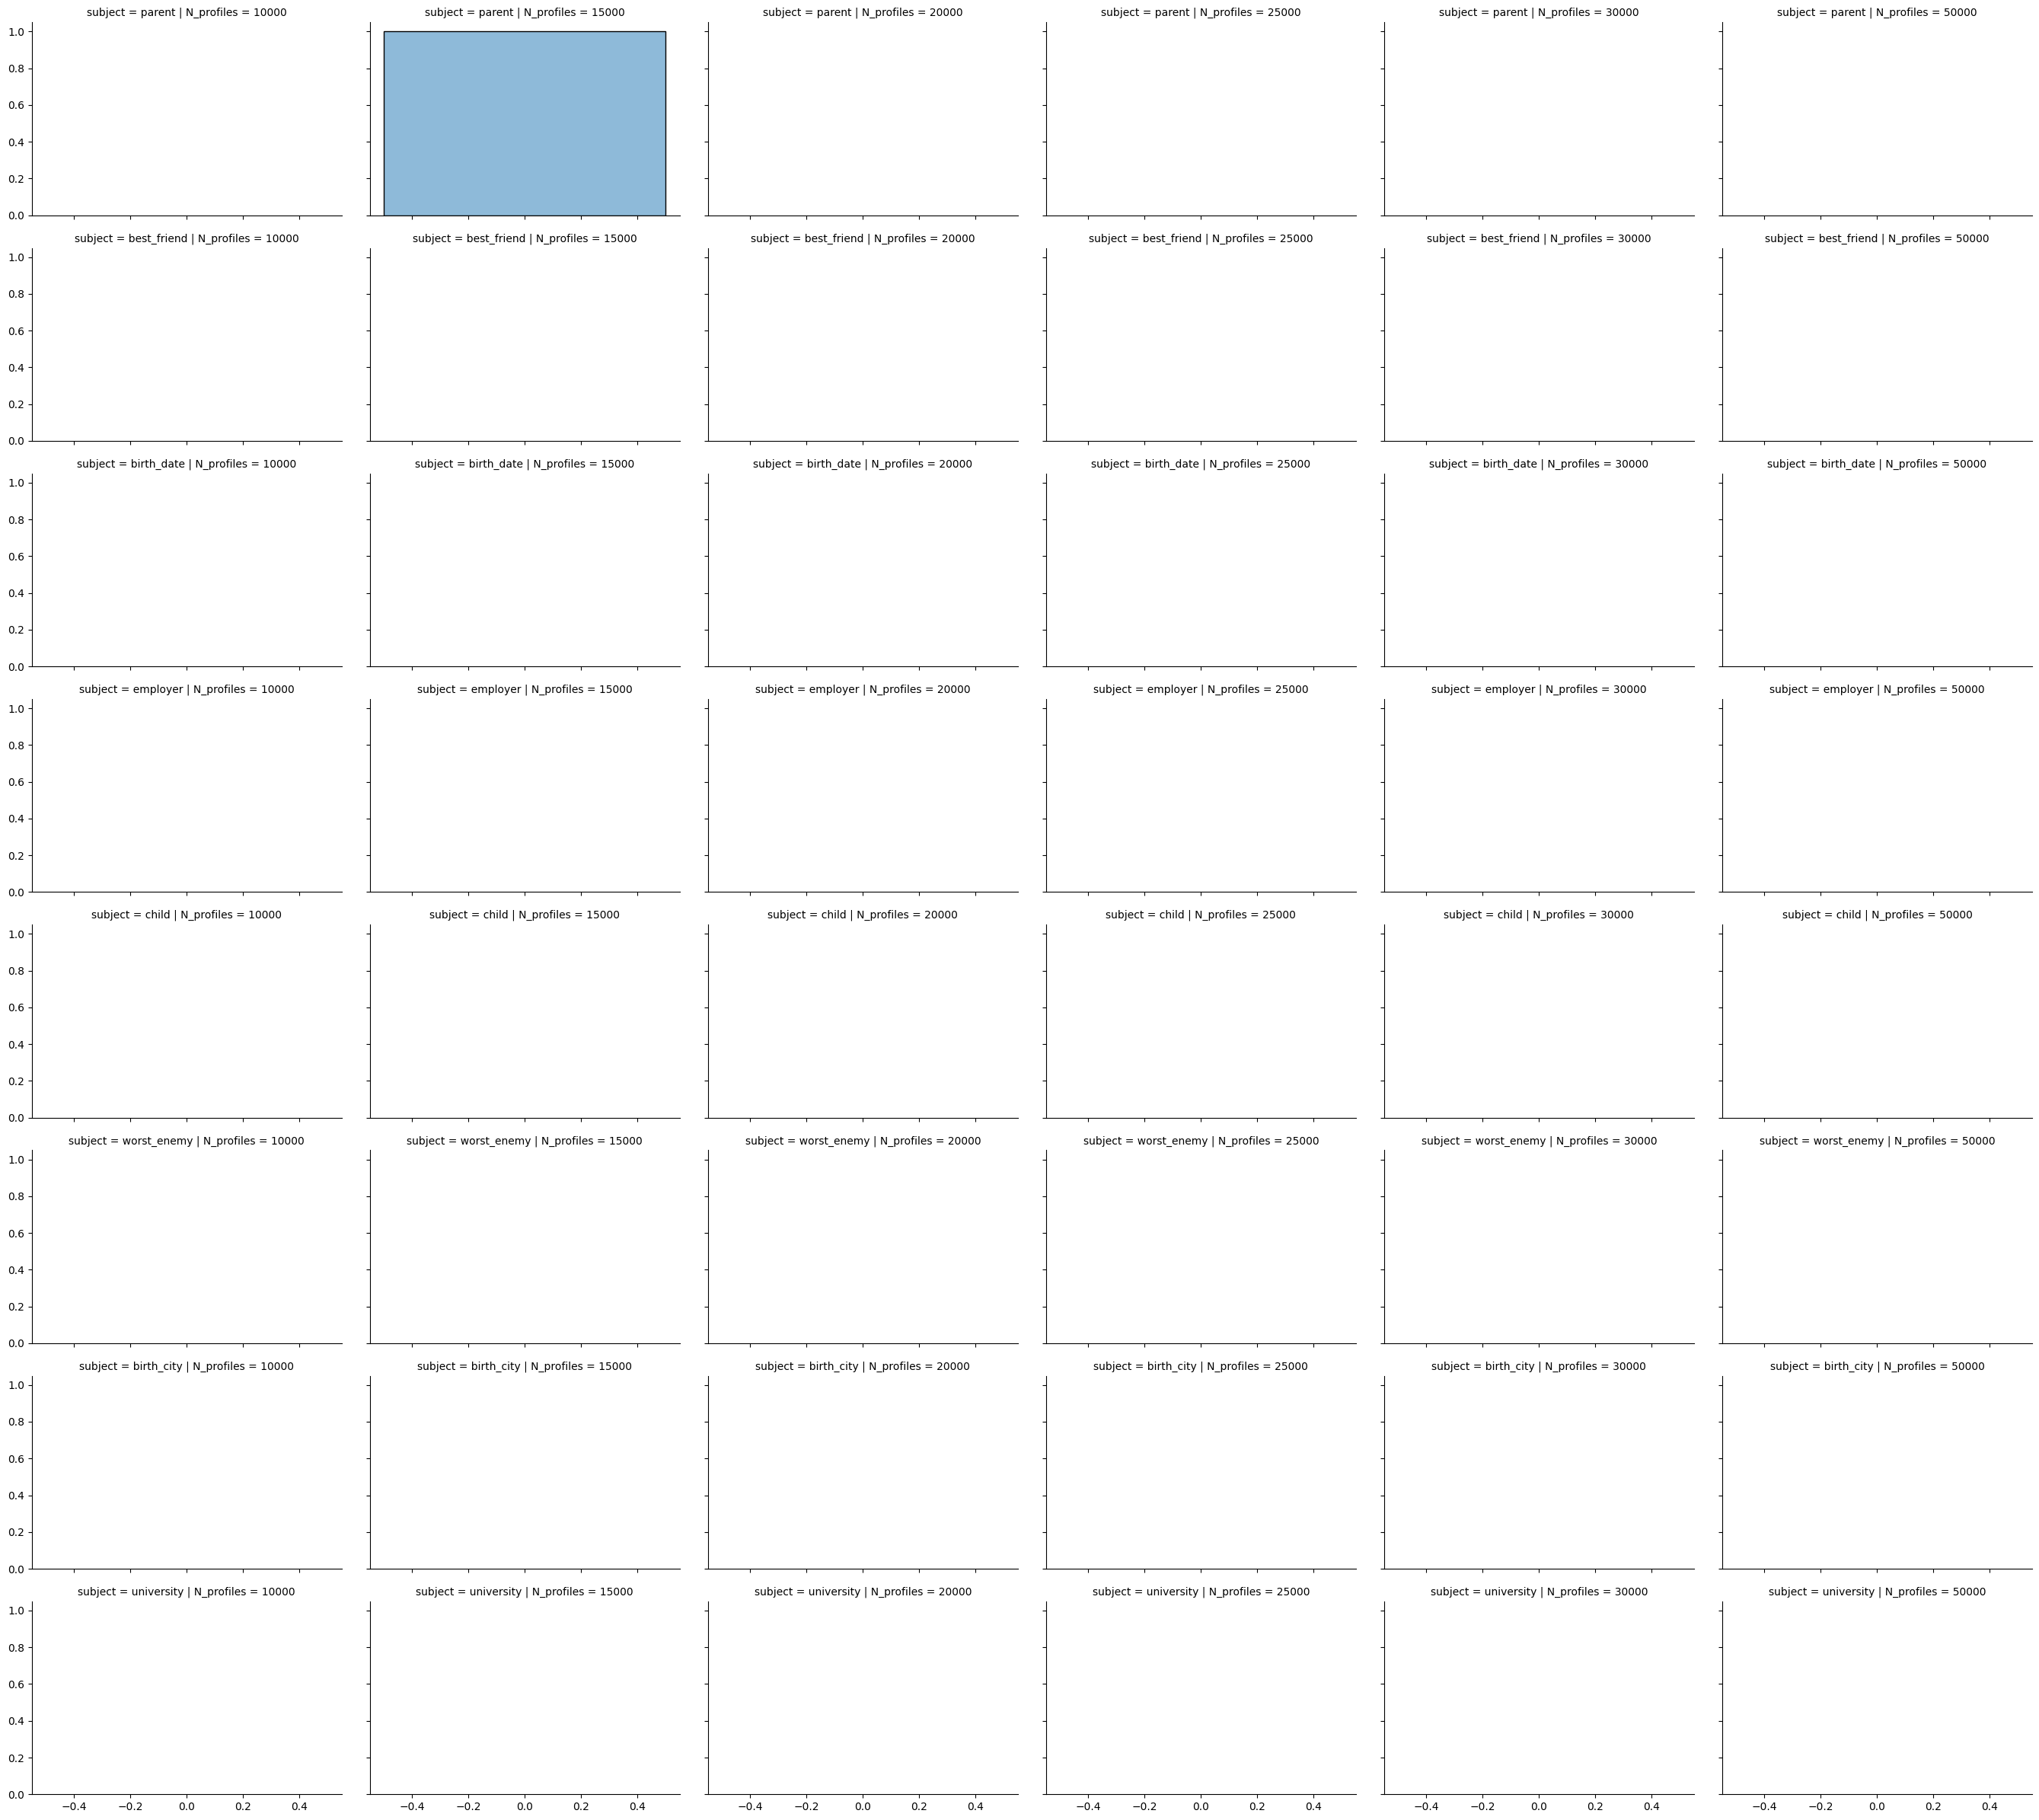

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path

def load_histogram_data():
    # Load batched histogram files
    batched_files = glob("results/loss_over_time_histograms_*_batched.csv")
    
    # If no batched files, try individual files
    if not batched_files:
        histogram_files = glob("results/*/eval_results_histograms.csv")
        if not histogram_files:
            raise FileNotFoundError("No histogram files found")
        dfs = [pd.read_csv(f) for f in histogram_files]
        hist_df = pd.concat(dfs, ignore_index=True)
    else:
        dfs = [pd.read_csv(f) for f in batched_files]
        hist_df = pd.concat(dfs, ignore_index=True)
    
    return hist_df


def plot_loss_histograms(hist_df):
    hist_df = hist_df[::1000]
    # First grouping
    g = sns.FacetGrid(
        hist_df,
        col='max_train_hops',
        row='hops',
        hue='n_params',
        height=4,
        aspect=1.5
    )
    g.map_dataframe(
        sns.histplot,
        x='loss',
        multiple="layer",
        alpha=0.5,
        stat='density',
        bins='auto'
    )
    g.add_legend()
    for ax in g.axes.ravel():
        ax.set_xscale('log')
    
    plt.savefig('results/plots/loss_hist_by_config.png', bbox_inches='tight')
    plt.close()

    for max_train_hops in hist_df['max_train_hops'].unique():
        plot_df = hist_df[(hist_df['max_train_hops'] == max_train_hops) & (hist_df['hops'] == max_train_hops)]
        # Second grouping with subjects
        g = sns.FacetGrid(
            plot_df,
            col='N_profiles',
            row='subject',
            hue='n_params',
            height=3,
            aspect=1.5
        )
        g.map_dataframe(
            sns.histplot,
            x='loss',
            multiple="layer",
            alpha=0.5,
            stat='density',
            bins='auto'
        )
        g.add_legend()
        for ax in g.axes.ravel():
            ax.set_xscale('log')
        
        plt.savefig(f'results/plots/loss_hist_by_subject_omax{max_train_hops}.png', bbox_inches='tight')
        plt.close()

# Usage:
hist_df = load_histogram_data()
hist_df['hops'] += 2
plot_loss_histograms(hist_df)

In [3]:
len(hist_df)

995689

In [4]:
len(hist_df[::100])

9957